# Simple SVM examples
Excecute the following examples to get a feeling for the SVM and how to use it with scikit-learn. We start with a random two dimensional data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#### Creation of data
We create 2 times 100 data points as follows:

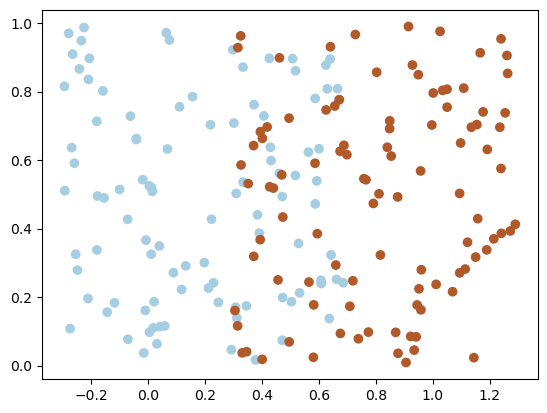

In [2]:
%matplotlib inline
np.random.seed(42)
y = np.concatenate((np.repeat(-1,100),np.repeat(1,100))) 
X = np.random.rand(200,2) 
X[:,0] += 0.3*y
np.shape(y)
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired)
plt.show()

#### Training and prediction using a SVM
Execute the following code and adpot the code to make predictions for a few other points. Does the result make sense?

In [3]:
C = 0.4
svc = svm.SVC(kernel='linear', C=C).fit(X,y)

In [4]:
svc.predict([(-0.4,1)])

array([-1])

#### Cross validation
Play around with the code below. Which parameter C gives the best leave-one-out cross validation error?

In [9]:
from sklearn import model_selection
C = 0.07 #C=1 C=0.1 #C=0.15 #C=0.07
svc = svm.SVC(kernel='linear', C=C)
loo = model_selection.LeaveOneOut() # Split into test and training data
# svc.fit(...).score() gives 1 if prediction is correct 0 otherwise 
res = [svc.fit(X[train], y[train]).score(X[test], y[test]) for train, test in loo.split(X)]
#res is a score vector within 0,1
np.mean(res) #The average accuracy

0.78

### Parameter Optimization
The following code is adapted from [here](https://github.com/robhowley/scikit-learn-tutorials/blob/master/model-selection.py) (originally from the scikit-learn repos) and shows how to systematically perform a parameter optimization. 

To do so, we split the data into a train and test set. First, we use the training set to find the parameters which give the best accuracy.
#### Finding the optimal parameter for the training set
We evaluate a linear and a RBF kernel with different parameters, using grid search.

In [31]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

n_samples = len(y)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 15, 100, 1000]},
                    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

score = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                   scoring=score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
results = clf.cv_results_
for i in range(len(results["params"])):
    print("%0.3f (+/-%0.03f) for %r" % (results["mean_test_score"][i], results["std_test_score"][i] * 2, results["params"][i]))

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.790 (+/-0.194) for {'C': 1, 'kernel': 'linear'}
0.780 (+/-0.174) for {'C': 10, 'kernel': 'linear'}
0.780 (+/-0.174) for {'C': 15, 'kernel': 'linear'}
0.790 (+/-0.194) for {'C': 100, 'kernel': 'linear'}
0.790 (+/-0.194) for {'C': 1000, 'kernel': 'linear'}
0.530 (+/-0.049) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.530 (+/-0.049) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.530 (+/-0.049) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.530 (+/-0.049) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.780 (+/-0.136) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.530 (+/-0.049) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.790 (+/-0.194) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.780 (+/-0.136) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


#### Evaluation of the optimal parameters on untouched test-set
We see that a SVM with a linear kernel is most appropriate. We now evaluate this parameters on the test set which we did not touch so far. Since we did not touch the test set yet, this performance is a good proxy for new unseen data (if it comes from the same distribution).

In [32]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
np.mean(y_true == y_pred)

              precision    recall  f1-score   support

          -1       0.74      0.85      0.79        47
           1       0.85      0.74      0.79        53

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100


0.79

(121,)


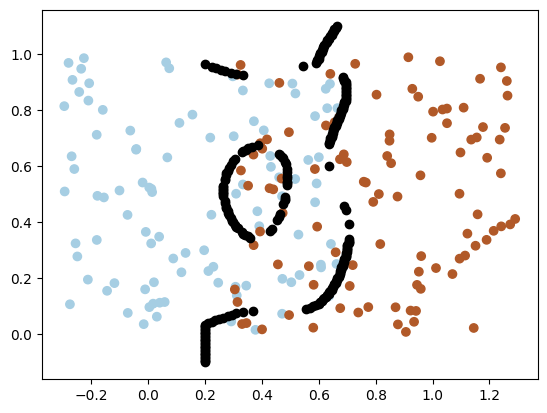

In [39]:
C = 20
svc = svm.SVC(kernel='rbf', C=C, gamma=10, probability=True).fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired)
X_data = np.arange(0.2, 0.8, 0.005)
Y_data = np.arange(-.1, 1.1, 0.005)
prediction_grid = np.zeros((len(X_data), len(Y_data)), float)
for i in range(len(X_data)):
    for j in range(len(Y_data)):
        #print(svc.predict_proba([(X_data[i], Y_data[j])]))
        probs = svc.predict_proba([(X_data[i], Y_data[j])])
        prediction_grid[i, j] = np.abs(probs[0][0]- probs[0][1])
print(X_data.shape)
for j in range(len(Y_data)):
    idx = np.argmin(prediction_grid[:, j])
    plt.scatter(X_data[idx], Y_data[j], c="black")
    

/var/folders/zc/7515kqlj3r90350hdc7p7yqw0000gq/T/ipykernel_34148/1497427200.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_grid[j, i] = svc.predict([(X_data[i], Y_data[len(Y_data)-j-1])])
/var/folders/zc/7515kqlj3r90350hdc7p7yqw0000gq/T/ipykernel_34148/1497427200.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_grid[j, i] = svc.predict([(X_data[i], Y_data[len(Y_data)-j-1])])
/var/folders/zc/7515kqlj3r90350hdc7p7yqw0000gq/T/ipykernel_34148/1497427200.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[-1. -1. -1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]
 ...
 [-1. -1. -1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1. -1.]]


/var/folders/zc/7515kqlj3r90350hdc7p7yqw0000gq/T/ipykernel_34148/1497427200.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_grid[j, i] = svc.predict([(X_data[i], Y_data[len(Y_data)-j-1])])
/var/folders/zc/7515kqlj3r90350hdc7p7yqw0000gq/T/ipykernel_34148/1497427200.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_grid[j, i] = svc.predict([(X_data[i], Y_data[len(Y_data)-j-1])])
/var/folders/zc/7515kqlj3r90350hdc7p7yqw0000gq/T/ipykernel_34148/1497427200.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your 

NameError: name 'warnings' is not defined

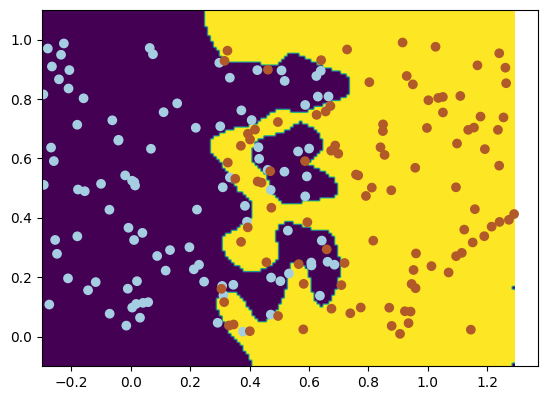

In [42]:

C = 20
svc = svm.SVC(kernel='rbf', C=C, gamma=100, probability=False).fit(X,y)
X_data = np.arange(-0.3, 1.3, 0.01)
Y_data = np.arange(-.1, 1.1, 0.01)
prediction_grid = np.zeros((len(Y_data), len(X_data)), float)
for i in range(len(X_data)):
    for j in range(len(Y_data)):
        prediction_grid[j, i] = svc.predict([(X_data[i], Y_data[len(Y_data)-j-1])])
print(prediction_grid)
plt.imshow(prediction_grid, extent=(np.min(X_data), np.max(X_data), np.min(Y_data), np.max(Y_data)))
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired)
warnings.filterwarnings('ignore')
